Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')


── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)



Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 4, 10, 8, 1, 13, 5, 5, 3, 6, 4, 3, …
$ Glucose                  <dbl> 85, 116, 115, 110, 139, 99, 97, 145, 117, 109…
$ BloodPressure            <dbl> 66, 74, 0, 92, 80, 84, 66, 82, 92, 75, 58, 92…
$ SkinThickness            <dbl> 29, 0, 0, 0, 0, 0, 15, 19, 0, 26, 11, 0, 33, …
$ Insulin                  <dbl> 0, 0, 0, 0, 0, 0, 140, 110, 0, 0, 54, 0, 192,…
$ BMI                      <dbl> 26.6, 25.6, 35.3, 37.6, 27.1, 35.4, 23.2, 22.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.201, 0.134, 0.191, 1.441, 0.388, 0.4…
$ Age                      <dbl> 31, 30, 29, 30, 57, 50, 22, 57, 38, 60, 22, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The variable "Outcome" will be suitable in a logistic regression model.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     |Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
| BMI         |Body mass index (weight in kg/(height in m)^2)          |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

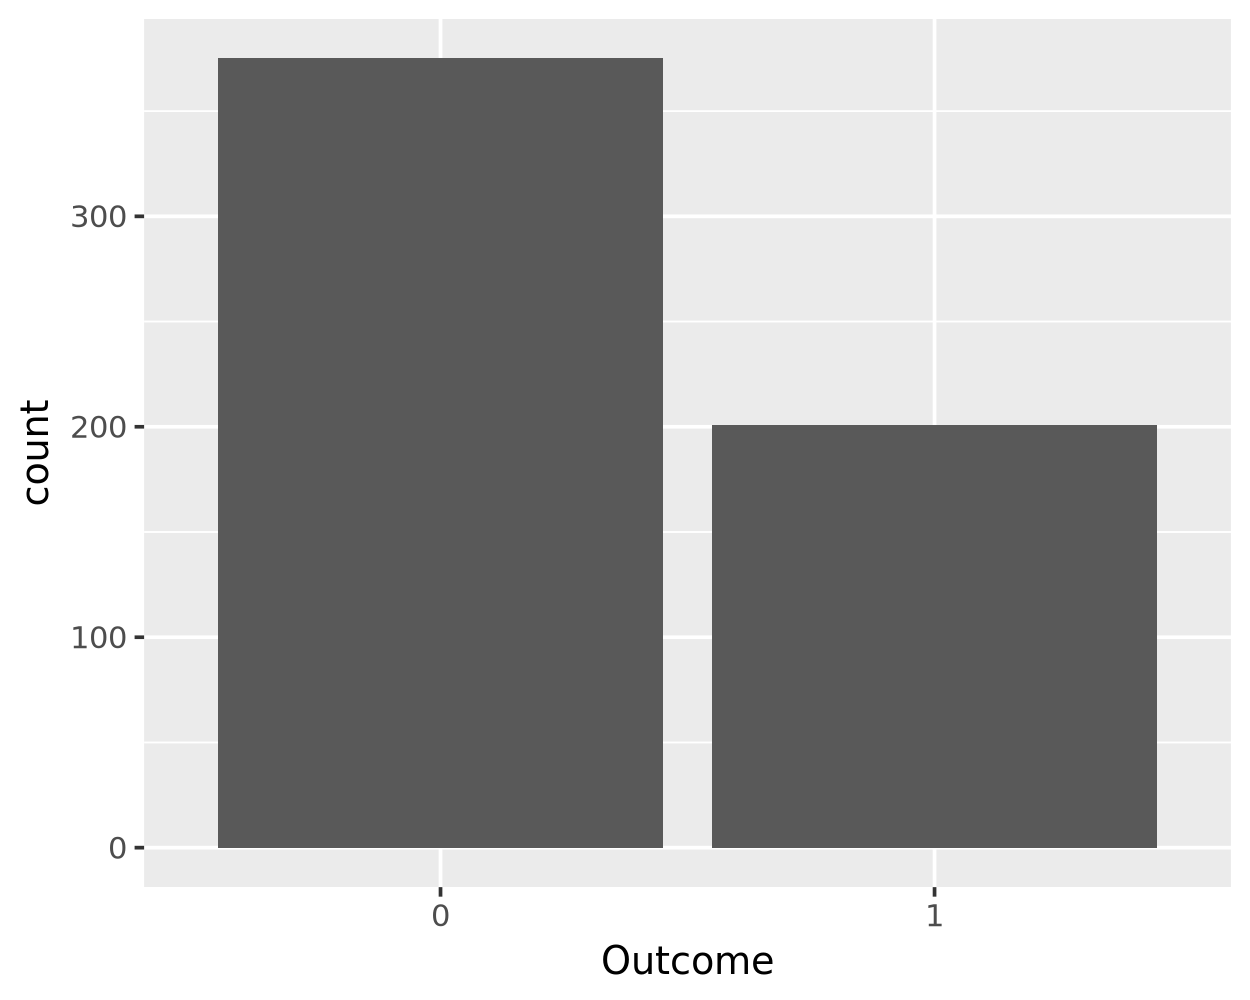

In [4]:
ggplot(diabetes_train, aes(x = Outcome)) +
       geom_bar() 
       

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No the data is imbalanced.



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

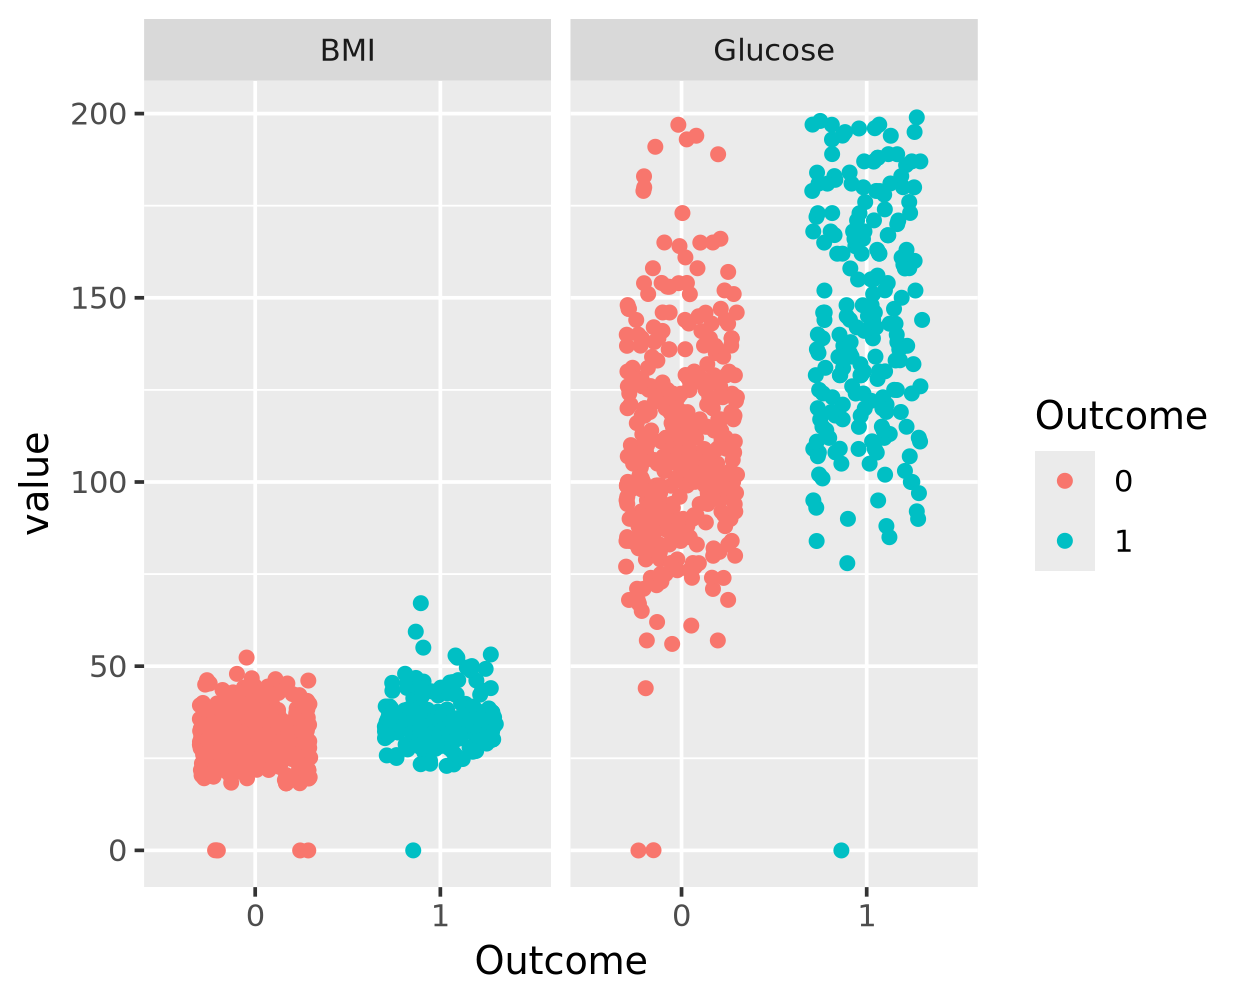

In [6]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) + 
geom_jitter(width = 0.3) +
facet_wrap(~name, ncol = 2, scales = 'free_x')



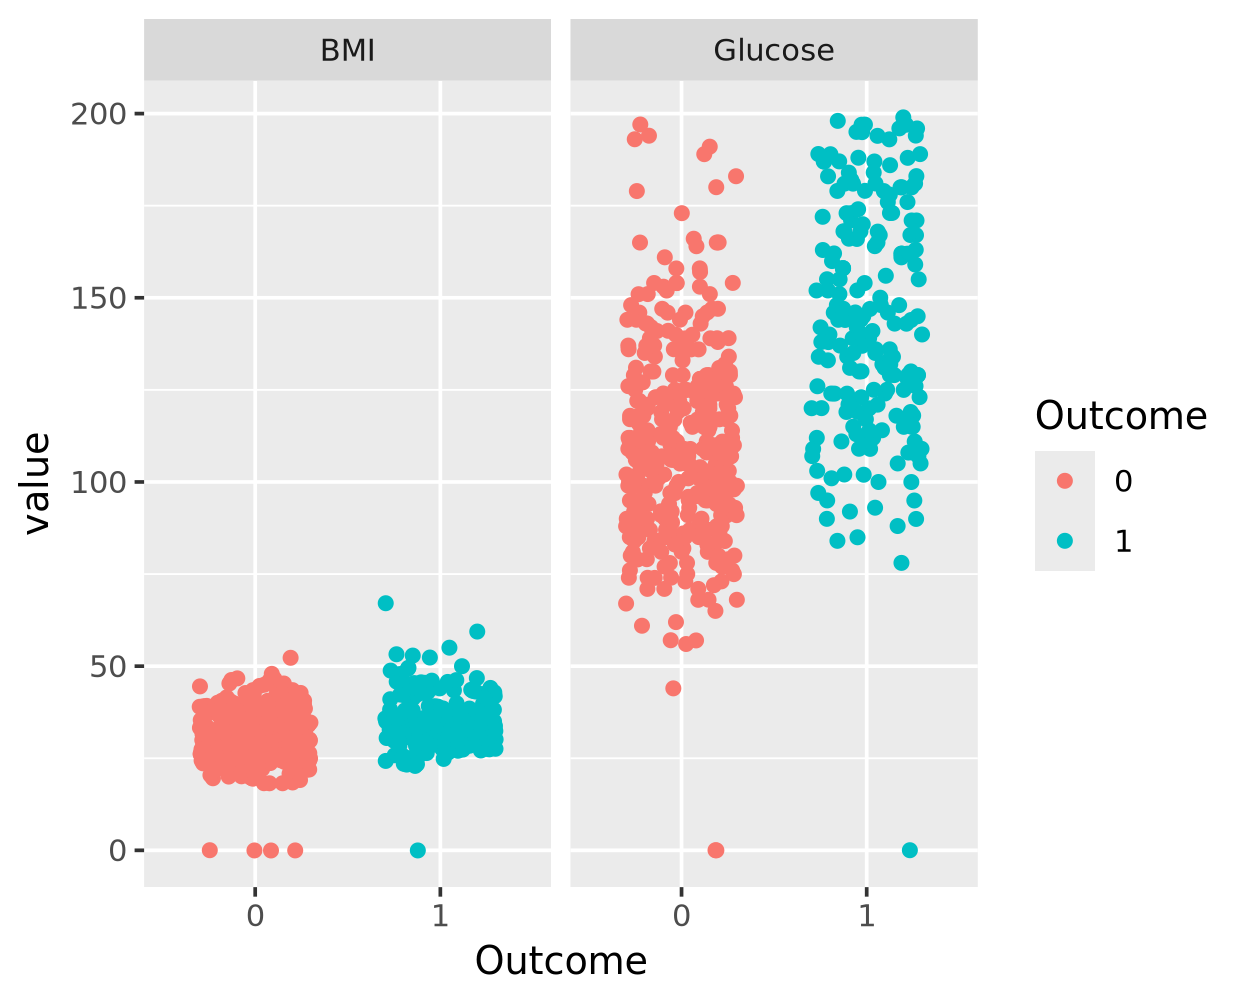

In [7]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) + 
geom_jitter(width = 0.3) +
facet_wrap(~name, ncol = 2,)


❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

The plots on the x - axis are fix to the same range.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [8]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)
print(mod_fit)

parsnip model object


Call:  stats::glm(formula = Outcome ~ BMI + Glucose, family = stats::binomial, 
    data = data)

Coefficients:
(Intercept)          BMI      Glucose  
   -7.87668      0.07878      0.03699  

Degrees of Freedom: 575 Total (i.e. Null);  573 Residual
Null Deviance:	    745.1 
Residual Deviance: 562.9 	AIC: 568.9


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [9]:
diabetes_test_wPred <- augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> head()




.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9145582,0.08544178,1,89,66,23,94,28.1,0.167,21,0
0,0.9627714,0.03722858,8,125,96,0,0,0.0,0.232,54,1
0,0.8301347,0.16986535,7,107,74,0,0,29.6,0.254,31,1
0,0.6581831,0.34181693,1,103,30,38,83,43.3,0.183,33,0
0,0.5298489,0.47015109,3,126,88,41,235,39.3,0.704,27,0
0,0.7667328,0.23326724,9,119,80,35,0,29.0,0.263,29,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [10]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 110  36
         1  15  31

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

1. There were cell(((0, 1) + (1, 1)) = 36 + 31) = 67 individuals that had diabetes.
2. There were cell(1, 1) = 31 predicted to have diabetes by the model.
3. There were cell(1, 0) = 15 predicted to have diabetes that did not have diabetes.